##### Çalışanlar için maaş üzerinde etkisi olabilecek özelliklerinin değerlendirilmesi yapılacaktır.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

# Veri Setinin Betimlenmesi

In [2]:
df = pd.read_csv("salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Scientist,100000,USD,100000,US,100,US,M
1,2023,MI,FT,Machine Learning Engineer,45000,EUR,48585,IT,100,GB,M
2,2023,MI,FT,Data Analyst,142000,USD,142000,US,0,US,M
3,2023,MI,FT,Data Analyst,128000,USD,128000,US,0,US,M
4,2023,SE,FT,ETL Developer,99500,USD,99500,US,0,US,M


In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Scientist,100000,USD,100000,US,100,US,M
1,2023,MI,FT,Machine Learning Engineer,45000,EUR,48585,IT,100,GB,M
2,2023,MI,FT,Data Analyst,142000,USD,142000,US,0,US,M
3,2023,MI,FT,Data Analyst,128000,USD,128000,US,0,US,M
4,2023,SE,FT,ETL Developer,99500,USD,99500,US,0,US,M


##### work_year = Maaşın ödendiği yıl
##### experience_level = Yıl boyunca işteki deneyim düzeyincerü


In [1]:
###### EN:Giriş Seviye
###### MI:Orta Seviye
###### SE:Kıdemli Seviye 
###### EX:Yönetici Seviye

##### empeoyment_type = İstİhdam türü
##### PT:Yarı Zamanlı
##### FT:Tam Zamanlı
##### CT:Sözleşmeli
##### FL:Serbest Çlaışan

##### job_title = Yıl boyunca çalışılan rol
##### salary = Ödenen toplam brüt maaş tutarı.
##### salary_currency = ISO 4217 para birimi kodu olarak ödenen maaşın para birimi
##### salary_in_usd = USD cinsinden maaş (döviz kuru, fxdata.foorilla.com üzerinden ilgili yıl için ortalama USD kuruna bölünür).
##### employee_residence =  ISO 3166 ülke kodu olarak çalışanın çalışma yılı boyunca ikamet ettiği birincil ülke.
##### remote_ratio = Uzaktan yapılan toplam iş miktarı, olası değerler aşağıdaki gibidir:
##### 0: Uzaktan çalışma yok (%20'den az)
##### 50: Kısmen uzak
##### 100: Tamamen uzaktan (%80'den fazla)
##### company_location =  ISO 3166 ülke kodu olarak işverenin ana ofisinin veya sözleşme şubesinin ülkesi.
##### company_size =  Yıl boyunca şirket için çalışan ortalama kişi sayısı:
##### S: 50'den az çalışan (küçük)
##### M: 50 ila 250 çalışan (orta)
##### L: 250'den fazla çalışan (büyük)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7366 entries, 0 to 7365
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           7366 non-null   int64 
 1   experience_level    7366 non-null   object
 2   employment_type     7366 non-null   object
 3   job_title           7366 non-null   object
 4   salary              7366 non-null   int64 
 5   salary_currency     7366 non-null   object
 6   salary_in_usd       7366 non-null   int64 
 7   employee_residence  7366 non-null   object
 8   remote_ratio        7366 non-null   int64 
 9   company_location    7366 non-null   object
 10  company_size        7366 non-null   object
dtypes: int64(4), object(7)
memory usage: 633.1+ KB


In [7]:
df.shape

(7366, 11)

In [8]:
#7366 satır 11 sütun

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,7366.0,2022.686261,0.579340,2020.0,2022.0,2023.0,2023.0,2023.0
salary,7366.0,178211.048737,494583.394595,14000.0,105200.0,144000.0,189327.5,30400000.0
salary_in_usd,7366.0,148570.102498,63913.438628,15000.0,105000.0,142200.0,185900.0,450000.0
remote_ratio,7366.0,40.673364,48.380788,0.0,0.0,0.0,100.0,100.0


In [10]:
#salary değişkeninde bir eksiklik varsa medyan ile doldurmak daha doğru olacaktır.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7366 entries, 0 to 7365
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           7366 non-null   int64 
 1   experience_level    7366 non-null   object
 2   employment_type     7366 non-null   object
 3   job_title           7366 non-null   object
 4   salary              7366 non-null   int64 
 5   salary_currency     7366 non-null   object
 6   salary_in_usd       7366 non-null   int64 
 7   employee_residence  7366 non-null   object
 8   remote_ratio        7366 non-null   int64 
 9   company_location    7366 non-null   object
 10  company_size        7366 non-null   object
dtypes: int64(4), object(7)
memory usage: 633.1+ KB


## Kategorik Değişkenlerin İncelenmesi ve Eksik Değer Varsa Doldurulması

In [12]:
df["experience_level"].value_counts() #sınıfların frekansı

SE    5290
MI    1439
EN     410
EX     227
Name: experience_level, dtype: int64

In [13]:
df["employment_type"].value_counts() #sınıfların frekansı 

FT    7324
CT      18
PT      13
FL      11
Name: employment_type, dtype: int64

In [14]:
df["job_title"].value_counts().sum() # toplam sınıf sayısı

7366

In [15]:
df["job_title"].value_counts() # sınıf frekansı

Data Engineer                           1762
Data Scientist                          1548
Data Analyst                            1112
Machine Learning Engineer                743
Applied Scientist                        208
                                        ... 
BI Data Engineer                           1
Managing Director Data Science             1
Data DevOps Engineer                       1
Sales Data Analyst                         1
Machine Learning Operations Engineer       1
Name: job_title, Length: 118, dtype: int64

In [16]:
df["salary_currency"].value_counts() # sınıf frekansı

USD    6640
EUR     308
GBP     278
INR      50
CAD      35
AUD      10
PLN       7
SGD       6
CHF       5
BRL       4
JPY       4
DKK       3
TRY       3
HUF       3
THB       2
NOK       2
ILS       1
HKD       1
ZAR       1
PHP       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

In [17]:
df["employee_residence"].value_counts() # sınıf frekansı

US    6205
GB     370
CA     173
ES     107
DE      65
      ... 
EC       1
AD       1
QA       1
MU       1
MT       1
Name: employee_residence, Length: 85, dtype: int64

In [18]:
df["employee_residence"].value_counts().sum() # toplam sınıf sayısı

7366

In [19]:
df["company_location"].value_counts() # sınıf frekansı

US    6252
GB     377
CA     174
ES     104
DE      72
      ... 
EC       1
AD       1
QA       1
MU       1
MT       1
Name: company_location, Length: 73, dtype: int64

In [20]:
df["company_location"].value_counts().sum() # toplam sınıf sayısı

7366

In [21]:
df["company_size"].value_counts() # sınıf frekansı;

M    6537
L     664
S     165
Name: company_size, dtype: int64

#### Boş Verilerin Değerlendirilmesi 

In [22]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [23]:
# herhangi bir boş verinin olmadığı gözüküyor

In [24]:
#Veri Seti Çeşitli Şekillerde Görselleştirildikten ve İncelendikten Sonra tüm kategorik değişkenler sayısallaştırılacaktır. 

# Veri Görselleştirme 

In [25]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Scientist,100000,USD,100000,US,100,US,M
1,2023,MI,FT,Machine Learning Engineer,45000,EUR,48585,IT,100,GB,M
2,2023,MI,FT,Data Analyst,142000,USD,142000,US,0,US,M
3,2023,MI,FT,Data Analyst,128000,USD,128000,US,0,US,M
4,2023,SE,FT,ETL Developer,99500,USD,99500,US,0,US,M


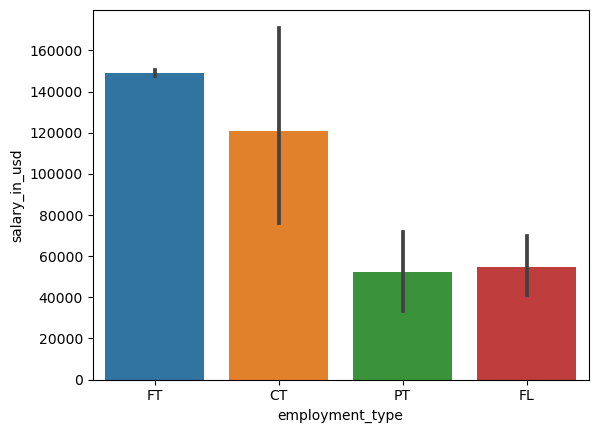

In [26]:
sns.barplot(x = "employment_type", y = "salary_in_usd",data = df);

In [27]:
#ortalama alınan maaşları çalışma tipine göre karşılaştıracak olursak en yükse maaşı FL(Serbest Çalışan) çalışanlarının aldığını görüyoruz.

In [28]:
#maaşlarda en fazla değişkene sözleşnme usulü çalışanlar olduğu görülüyor.

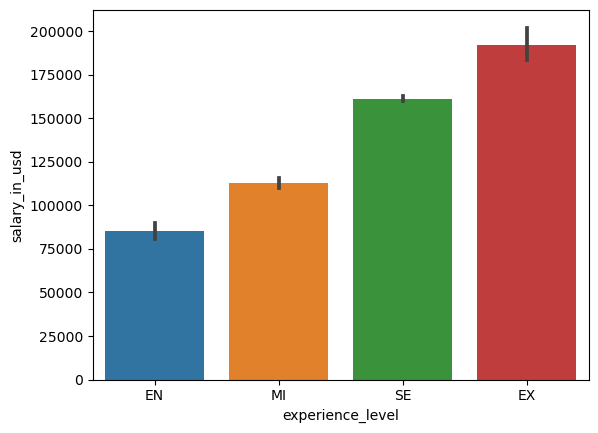

In [29]:
sns.barplot(x = "experience_level", y = "salary_in_usd",data = df);

In [30]:
#maaş ortalamaları USD bazında bekledniği gibi 

In [31]:
# muhtemelen en normal dağılan da SE başlığına sahip olanlar 

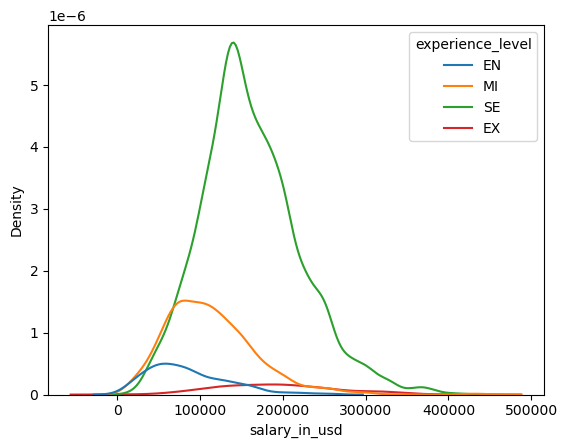

In [32]:
sns.kdeplot(x = df.salary_in_usd, hue = "experience_level",data = df);

In [33]:
#buradan da analşılacağı üzere en normal dağılım SE

In [34]:
#aynı zamanda da veri setinde en fazla bulunan SE

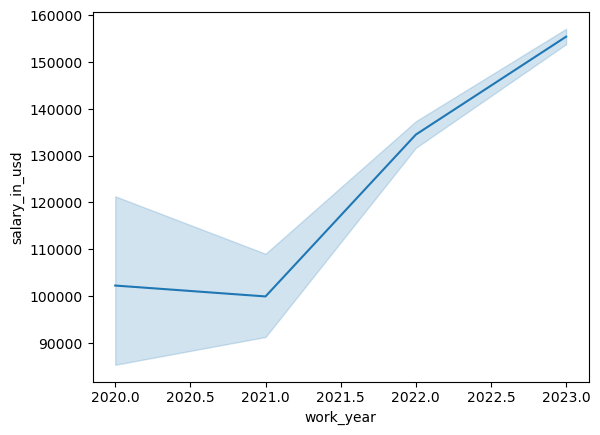

In [35]:
sns.lineplot(y = "salary_in_usd",x ="work_year", data = df);

In [36]:
#2019 Panedemi sonrası maaşlar 2021 yılına kadar azalmış (düşük şiddete) sonrasında yüksek şiddette artış göstermiş 

In [37]:
#buraya kadar beklenmeyen ilginç bir olay yok 

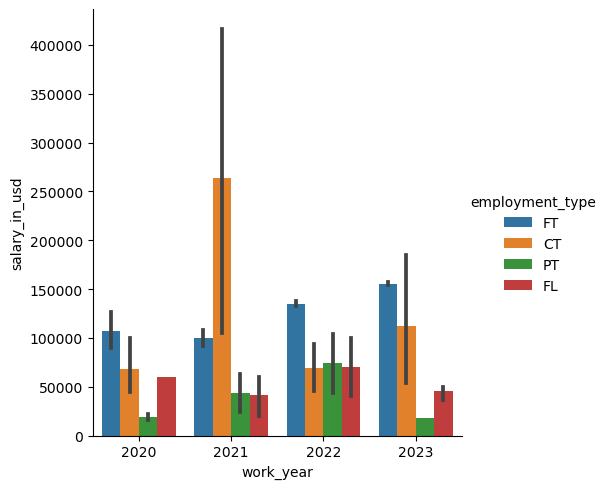

In [38]:
sns.catplot(y = "salary_in_usd", x = "work_year", hue = "employment_type" , kind = "bar", data = df);

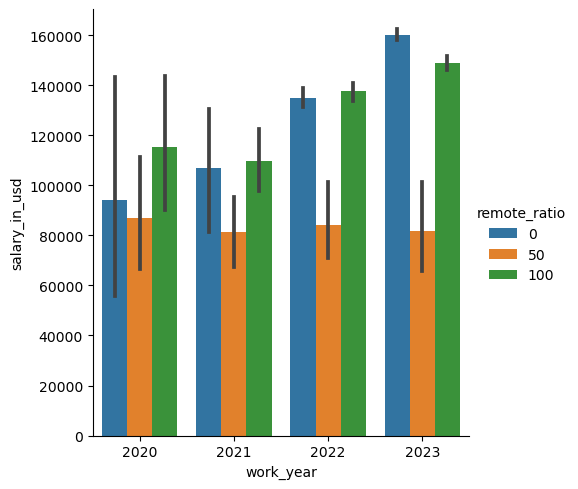

In [39]:
sns.catplot(y = "salary_in_usd", x = "work_year", hue = "remote_ratio" , kind = "bar", data = df);

In [40]:
#2020 yılında full time ve hibrid birbirine yaklaşmış ancak diğer yıllarda bu fark hibridin lehine açılmış

In [41]:
#2020 yılında en fazla kazandıran pandemi sonrasına rağmen Full Time olmuş 

In [42]:
#2021 yılında sözleşmeli de patlama yaşanmış 

In [43]:
#2022 yılında full time eski yerini almış 

In [44]:
#2023 yılında FL tahtını koruyor ama max maasşta Sözleşmeli öne geçmiş 

In [45]:
df.head() #hatırlatma adıa ara ara çağırdım

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Scientist,100000,USD,100000,US,100,US,M
1,2023,MI,FT,Machine Learning Engineer,45000,EUR,48585,IT,100,GB,M
2,2023,MI,FT,Data Analyst,142000,USD,142000,US,0,US,M
3,2023,MI,FT,Data Analyst,128000,USD,128000,US,0,US,M
4,2023,SE,FT,ETL Developer,99500,USD,99500,US,0,US,M


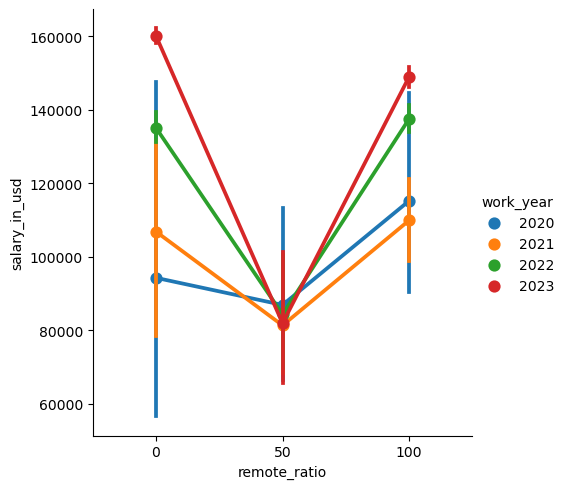

In [46]:
sns.catplot(y = "salary_in_usd", x = "remote_ratio", hue = "work_year" , kind = "point", data = df);

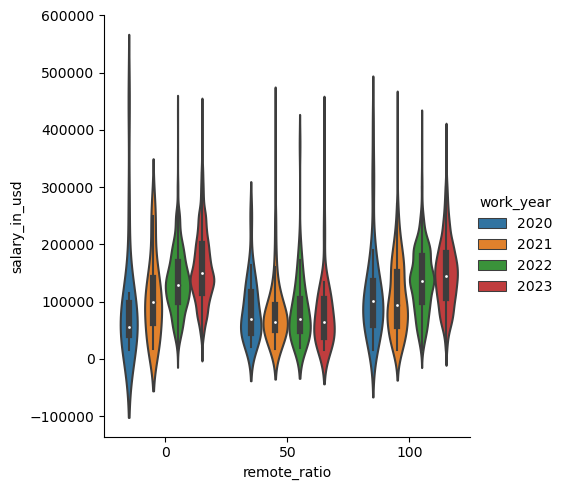

In [47]:
sns.catplot(y = "salary_in_usd", x = "remote_ratio", hue = "work_year" , kind = "violin", data = df);

In [48]:
#en az maaşı hibrid çalışanların aldığını görüyoruz

In [49]:
#diğer değişkenlerin sınıf sayısıı fazla olduğu için direk korelasyon analizine geçiyorum.

In [50]:
df.corr()

C:\Users\onury\AppData\Local\Temp\ipykernel_9944\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.089591,0.201074,-0.201052
salary,-0.089591,1.000000,0.031470,0.021540
salary_in_usd,0.201074,0.031470,1.000000,-0.095221
remote_ratio,-0.201052,0.021540,-0.095221,1.000000


In [51]:
# work_year'ın salary_in_usd ve remote_ratio ile arasında düşük bir korelasyon var diğer ilişkiler incelenmeye değer gibi durmuyor

### Veri Standartlaştırılması

In [52]:
# Veri Setini Makine Öğrenmesi Algoritmalarının Kabul Edeceği Hale Getirmek İçin Kategorik Değişkenleri Sayısallaştırıyoruz. 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7366 entries, 0 to 7365
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           7366 non-null   int64 
 1   experience_level    7366 non-null   object
 2   employment_type     7366 non-null   object
 3   job_title           7366 non-null   object
 4   salary              7366 non-null   int64 
 5   salary_currency     7366 non-null   object
 6   salary_in_usd       7366 non-null   int64 
 7   employee_residence  7366 non-null   object
 8   remote_ratio        7366 non-null   int64 
 9   company_location    7366 non-null   object
 10  company_size        7366 non-null   object
dtypes: int64(4), object(7)
memory usage: 633.1+ KB


In [54]:
from sklearn.preprocessing import LabelEncoder

lbe =  LabelEncoder()

In [55]:
df["experience_level"] = lbe.fit_transform(df["experience_level"])

In [56]:
df["employment_type"] = lbe.fit_transform(df["employment_type"])

In [57]:
df["job_title"] = lbe.fit_transform(df["job_title"])

In [58]:
df["salary_currency"] = lbe.fit_transform(df["salary_currency"])

In [59]:
df["employee_residence"] = lbe.fit_transform(df["employee_residence"])

In [60]:
df["company_location"] = lbe.fit_transform(df["company_location"])

In [61]:
df["company_size"] = lbe.fit_transform(df["company_size"])

In [62]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,0,2,62,100000,20,100000,81,100,71,1
1,2023,2,2,89,45000,6,48585,45,100,27,1
2,2023,2,2,33,142000,20,142000,81,0,71,1
3,2023,2,2,33,128000,20,128000,81,0,71,1
4,2023,3,2,74,99500,20,99500,81,0,71,1
